<a href="https://colab.research.google.com/github/rajy4683/S12EVA4/blob/master/S12EVA4_ImgNet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Apr 18 05:20:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Dependencies


In [0]:
#!git clone https://github.com/rajy4683/RekogNizer.git /content/drive/My\ Drive/EVA4/RekogNizer

In [3]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

     |████████████████████████████████| 112kB 4.8MB/s 
     |████████████████████████████████| 1.4MB 14.4MB/s 
     |████████████████████████████████| 102kB 13.5MB/s 
     |████████████████████████████████| 112kB 61.1MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
     |████████████████████████████████| 460kB 51.0MB/s 
     |████████████████████████████████| 634kB 50.4MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 71kB 10.6MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.2-cp36-none-any.whl size=73605 sha256=955bc3d69f2b3b16d34d5c6a1e743a2c6d27aaba214a73b871c8d7ea7bcb45c3
  Stored in directory: /root/.cache/pip/wheels/bc/ed/6c/028dea90d31b359cd2a7c8b0da4db80e41d24a59614154072e
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=003ed095a0a41f0aff0fc2f997f515db5bd8591a647b8bb56438fbd15e600998
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786

In [4]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-0frd78rm
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-0frd78rm
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=01030973a212835c805e84358a383ae833949d188bbdc607d26cad96d95e38cb
  Stored in directory: /tmp/pip-ephem-wheel-cache-2vyjzr3a/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


#### WANDB client login

In [5]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/')
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')

In [0]:
%load_ext autoreload

In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/EVA4/tiny_imagenet/ti2/ti201/train.zip', 'r') as zipObj:
    # Extract all the contents of zip file in different directory
    zipObj.extractall('/content/t2')

In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/EVA4/tiny_imagenet/ti2/ti201/val.zip', 'r') as zipObj:
    # Extract all the contents of zip file in different directory
    zipObj.extractall('/content/t2')

In [0]:
!cp /content/drive/My\ Drive/EVA4/tiny_imagenet/ti2/ti201/w*txt /content/t2/

In [0]:
path="/content/drive/My Drive/EVA4/tiny_imagenet/ti2/ti201/"
def get_id_dictionary():
    id_dict = {}
    for i, line in enumerate(open( path + 'wnids.txt', 'r')):
        id_dict[line.replace('\n', '')] = i
    return id_dict

In [12]:
id_dict=get_id_dictionary()
len(id_dict)

200

In [13]:
!!ls -1 /content/t2/train|wc -l


['200']

In [14]:
!ls -1 /content/t2/val/images|wc -l

10000


In [0]:
def get_class_to_id_dict():
    id_dict = get_id_dictionary()
    all_classes = {}
    result = {}
    for i, line in enumerate(open( path + 'words.txt', 'r')):
        n_id, word = line.split('\t')[:2]
        all_classes[n_id] = word
    for key, value in id_dict.items():
        result[value] = (key, all_classes[key])  
    return result

In [0]:
get_class_to_id_dict()

In [15]:
%autoreload 2
from RekogNizer import lrfinder
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader
from RekogNizer import dataloader

from torchsummary import summary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize, Cutout, MotionBlur
from albumentations import (
    HorizontalFlip, Compose, RandomCrop, Cutout,Normalize, HorizontalFlip, RandomBrightnessContrast,
    Resize,RandomSizedCrop, MotionBlur,MultiplicativeNoise,InvertImg,PadIfNeeded,Flip, IAAFliplr,
)
from albumentations.pytorch import ToTensor


from RekogNizer import hyperparams
# hyper_param_values = {
#                       "lr":0.21694816106338752,
#                       "dropout":0.1, 
#                       "momentum":0.7062620648684866, 
#                       "epochs":100, 
#                       "weight_decay":0.00015753761358641488
#                       }
#hyperparams.set_hyperparam(hyper_param_values)
torch.manual_seed(hyperparams.hyperparameter_defaults['seed'])    


  pip install torch-lr-finder -v --global-option="amp"


In [0]:
import torch
import torchvision
#import torchvision.transforms as transforms
from RekogNizer import hyperparams
from RekogNizer import dataloader
from RekogNizer import traintest
from RekogNizer import basemodelclass

# from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize, Cutout, MotionBlur
# from albumentations import (
#     HorizontalFlip, Compose, RandomCrop, Cutout,Normalize, HorizontalFlip, RandomBrightnessContrast,
#     Resize,RandomSizedCrop, MotionBlur,MultiplicativeNoise,InvertImg,
# )
# from albumentations.pytorch import ToTensor
# import random

from torchvision.datasets.vision import VisionDataset
from torchvision.datasets.utils import check_integrity, download_and_extract_archive
import os
import sys
import numpy as np

if sys.version_info[0] == 2:
    import cPickle as pickle
else:
    import pickle

In [0]:
train_path = "/content/t2/train"
test_path="/content/t2/val"

#trainloader = dataloader.get_imagenet_loaders(train_path, test_path, transform_train=None, transform_test=None)

In [0]:
from RekogNizer import imgnetloader
from torchvision import datasets
#import albumentations
basic_transform = Compose([
    #MotionBlur(blur_limit=7, always_apply=True, p=1),
    Resize(32, 32, interpolation=1, always_apply=True, p=1),
    Normalize(
      mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
    ),
    ToTensor()
    ])
train_data = imgnetloader.MyImageFolder(train_path, test_root=test_path, transform=basic_transform)


In [0]:
type(id_dict)

dict

In [0]:
sample_list = imgnetloader.make_dataset(train_path, test_path, id_dict, imgnetloader.IMG_EXTENSIONS, None)

In [0]:
my_keys = list(id_dict.keys())

In [0]:
from torch import randperm
sample_len = len(sample_list)
split_pct = 0.7
lengths = [int(sample_len*split_pct), int(sample_len*(1-split_pct))]
#train_data_img, test_data_img = torch.utils.data.dataset.random_split(train_data, lengths)
indices = randperm(sum(lengths)).tolist()

In [0]:
sample_train  =[sample_list[idx ] for idx in indices[:int(sample_len*split_pct)]]
sample_test  =[sample_list[idx ] for idx in indices[int(sample_len*split_pct):]]

In [0]:
# (self, root, samples, class_to_idx, loader,  extensions=None, test_root=None,transform=None,
#                  target_transform=None, is_valid_file=None)

train_data,test_data=imgnetloader.generate_timgnet_train_test_data("/content/t2/", split_pct, None, None )

In [0]:
dataloader.get_imagenet_loaders(train_path, test_path, transform_train=None, transform_test=None)

Compose([
  Cutout(always_apply=True, p=1, num_holes=1, max_h_size=16, max_w_size=16),
  MotionBlur(always_apply=True, p=1, blur_limit=(3, 7)),
  Resize(always_apply=True, p=1, height=32, width=32, interpolation=1),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0),
  ToTensor(always_apply=True, p=1.0, num_classes=1, sigmoid=True, normalize=None),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}) Compose([
  Resize(always_apply=True, p=1, height=32, width=32, interpolation=1),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0),
  ToTensor(always_apply=True, p=1.0, num_classes=1, sigmoid=True, normalize=None),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})


(<torch.utils.data.dataloader.DataLoader at 0x7f87d5bfb240>,
 <torch.utils.data.dataloader.DataLoader at 0x7f87d5bfb0b8>)

In [0]:
sample_test[0]

('/content/t2/train/n04074963/images/n04074963_485.JPEG', 54)

In [0]:
len(sample_train),len(sample_test)

(77000, 33000)

In [0]:
type(train_data.class_to_idx)

dict

In [0]:
lengths = [int(len(train_data)*0.8), int(len(train_data)*0.2)]
train_data_img, test_data_img = torch.utils.data.dataset.random_split(train_data, lengths)
#train_data = 

In [0]:
fig = plt.figure(figsize=(64,64))

for idx in np.arange(25):
    ax = fig.add_subplot(5, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(train_data[idx+100020][0], (1, 2, 0)))

In [0]:
kwargs = {'num_workers': 2, 'pin_memory': True}
trainloader = torch.utils.data.DataLoader(train_data_img, batch_size=64,shuffle=True,**kwargs)
testloader = torch.utils.data.DataLoader(test_data_img, batch_size=64,shuffle=True,**kwargs)

In [0]:
train_data[0][0].shape

torch.Size([3, 64, 64])

In [0]:
#import tqdm

dataiter = iter(trainloader)
data,target = dataiter.next()

### RandomCrop + Fliplr + Cutout

In [0]:
transform_train = Compose([
    #Cutout(num_holes=1,max_h_size=16,max_w_size=16,always_apply=True,p=1,fill_value=[0.5268*255, 0.5267*255, 0.5328*255]),
    PadIfNeeded(min_height=40,min_width=40, always_apply=True, p=1.0),
    RandomCrop(height=32,width=32, p=1),
    #Flip(p=0.5),
    IAAFliplr(p=0.5),
    Cutout(num_holes=1,max_h_size=8,max_w_size=8,always_apply=True,p=1,fill_value=[0.4914*255, 0.4826*255, 0.44653*255]),
    Normalize(
      mean=[0.4914, 0.4826, 0.44653],
      std=[0.24703, 0.24349, 0.26519],
      ),
    # Normalize(
    #    mean=[0.5268, 0.5267, 0.5328],
    #    std=[0.3485, 0.3444, 0.3447],
    #    ),
    
    ToTensor()
    ])
trainloader, testloader = dataloader.get_train_test_dataloader_cifar10(transform_train=transform_train)

torch.manual_seed(1)
dataiter = iter(trainloader)
images, labels = dataiter.next()

fileutils.show_sample_images(images,labels, dataloader.classes)

### LR Range Test
LR Range test. For lr < 0.03 accuracy was ~85% and also training stopped between 0.01-0.03. Hence, a range test with 0.03 to 1 was performed as below where training Accuracy reached ~90.3


In [0]:
%autoreload 1
from RekogNizer import dataloader
from RekogNizer import traintest
from RekogNizer import basemodelclass
from RekogNizer import imgnetloader
#model_new = basemodelclass.ResNet18(hyperparams.hyperparameter_defaults['dropout'])
model_new = basemodelclass.S11ResNet()
summary(model_new.to(torch.device("cuda")),input_size=(3, 32, 32))


torch.manual_seed(1)
criterion = nn.CrossEntropyLoss()

transform_train = Compose([
#MotionBlur(blur_limit=7, always_apply=True, p=1),
Resize(32, 32, interpolation=1, always_apply=True, p=1),
Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
),
ToTensor()
])
train_path = "/content/drive/My Drive/EVA4/tiny_imagenet/ti2/ti202/train"
test_path="/content/drive/My Drive/EVA4/tiny_imagenet/ti2/ti201/val"
trainloader, testloader = dataloader.get_imagenet_loaders(train_path, test_path, transform_train=transform_train, transform_test=None)


optimizer = optim.SGD(model_new.parameters(), lr=0.0000279445101495624, weight_decay=0.0,momentum=0.85)

#traintest.find_lr_type1(model_new, optimizer, criterion, trainloader, seed=1)
lr_finder = traintest.find_lr_type1(model_new, optimizer, criterion, 
                                    trainloader, testloader=testloader, 
                                    seed=1,num_iter=1000,
                                    start_lr=0.01,end_lr=1, step_mode='linear')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
 ModifiedResBlock-14          [-1, 128,

Epoch:1.0 val_acc:1.1393939393939394 loss:5.294460005326704 lr:0.010471285480508996 
Epoch:2.0 val_acc:2.0454545454545454 loss:5.238347410491018 lr:0.01096478196143185 
Epoch:3.0 val_acc:2.6787878787878787 loss:5.139794658314098 lr:0.011481536214968828 
Epoch:4.0 val_acc:3.2696969696969695 loss:5.024777538993142 lr:0.01202264434617413 
Epoch:5.0 val_acc:4.206060606060606 loss:4.942727124763257 lr:0.012589254117941673 
Epoch:6.0 val_acc:4.715151515151515 loss:4.8475817041108105 lr:0.013182567385564071 
Epoch:7.0 val_acc:5.0 loss:4.79312776854544 lr:0.013803842646028849 
Epoch:8.0 val_acc:6.324242424242424 loss:4.690986100399133 lr:0.014454397707459274 
Epoch:9.0 val_acc:6.387878787878788 loss:4.621371537873239 lr:0.015135612484362083 
Epoch:10.0 val_acc:7.8121212121212125 loss:4.542938084342263 lr:0.015848931924611138 
Epoch:11.0 val_acc:8.581818181818182 loss:4.494201220656886 lr:0.016595869074375606 
Epoch:12.0 val_acc:9.460606060606061 loss:4.43127263803193 lr:0.017378008287493755 
E

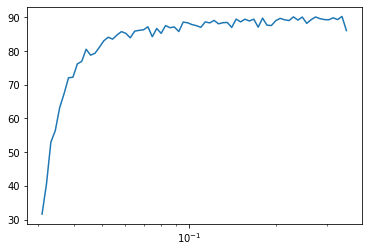

In [0]:
lrs = lr_finder.history['lr']
acc = lr_finder.history['val_acc']
#plt.plot(acc, np.arange(len(acc)))

plt.plot(lrs,acc)#,lrs)
plt.xscale("log")
#plt.xlabel("Learning rate")
#plt.ylabel("acc")

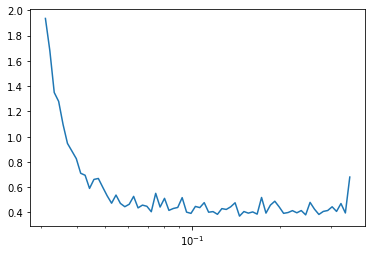

In [0]:
lrs = lr_finder.history['lr']
acc = lr_finder.history['loss']
#plt.plot(acc, np.arange(len(acc)))

plt.plot(lrs,acc)#,lrs)
plt.xscale("log")
#plt.xlabel("Learning rate")
#plt.ylabel("acc")

In [0]:
lr_finder.history.pop('acc')
df_lrf = pd.DataFrame(lr_finder.history)

In [0]:
df_lrf.describe()

,lr,loss,val_acc
count,70.000000,70.000000,70.000000
mean,0.132356,0.553262,83.485143
std,0.090200,0.292335,11.100667
min,0.031071,0.370778,31.600000
25%,0.056898,0.407237,84.165000
50%,0.104186,0.444979,87.395000
75%,0.190761,0.530244,89.110000
max,0.349250,1.935421,90.300000


In [0]:
0.39810717055349737

In [0]:
indices

In [26]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_s12_new.py -p '{"lr":0.015084, "ocp_max_lr":0.7, "anneal_strategy":"cos","div_factor":128,"final_div_factor":64, "momentum":0.85, "epochs":24, "weight_decay":0.00099,"batch_size":512}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  ocp_max_lr  =  0.7
Setting  anneal_strategy  =  cos
Setting  div_factor  =  128
Setting  final_div_factor  =  64
Setting  momentum  =  0.85
Setting  epochs  =  24
Setting  weight_decay  =  0.00099
Setting  batch_size  =  512
Final Hyperparameters
             dropout : 0.1 
          batch_size : 512 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.85 
             no_cuda : False 
                seed : 1 
              epochs : 24 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.00099 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.7 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : cos 
           pct_start : 0.208 
      cycle_momentum : False 
Initializing datasets and dataloader

### Accuracy Plots


In [0]:
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

import pandas as pd
import numpy as np
import torch

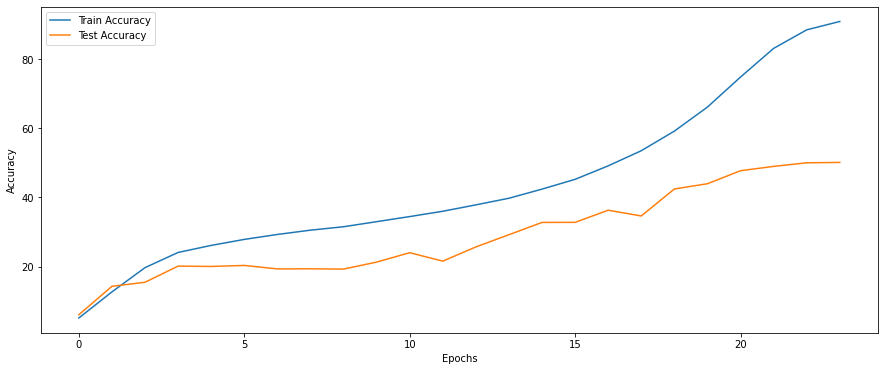

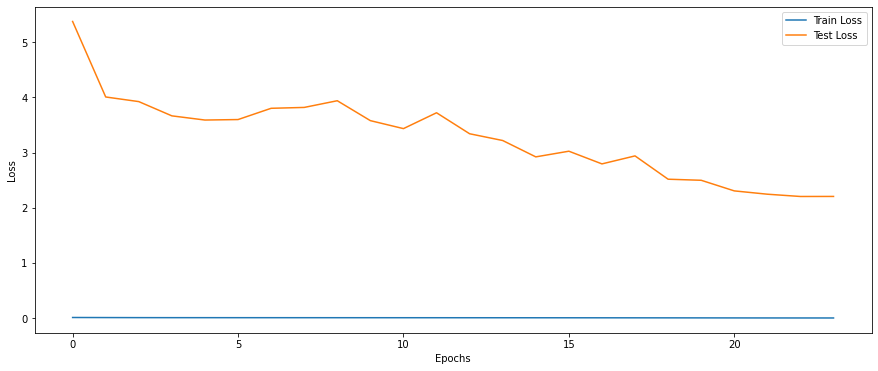

In [28]:
run_list = ['rajy4683/news5/runs/kv0j4kpn']
runs_df = logger.get_wandb_dataframes(run_list=run_list)#(project="rajy4683/news5",count=1)
new_df = pd.DataFrame().append(runs_df)


fileutils.plot_graphs([new_df],
            ['Train Accuracy', 'Test Accuracy'],
            columns=['Train Accuracy', 'Test Accuracy'],
            xlabel="Epochs",
            ylabel="Accuracy")

fileutils.plot_graphs([new_df],
            ['Train Loss', 'Test Loss'],
            columns=['Train Loss', 'Test Loss'],
            xlabel="Epochs",
            ylabel="Loss")

### LR Plot

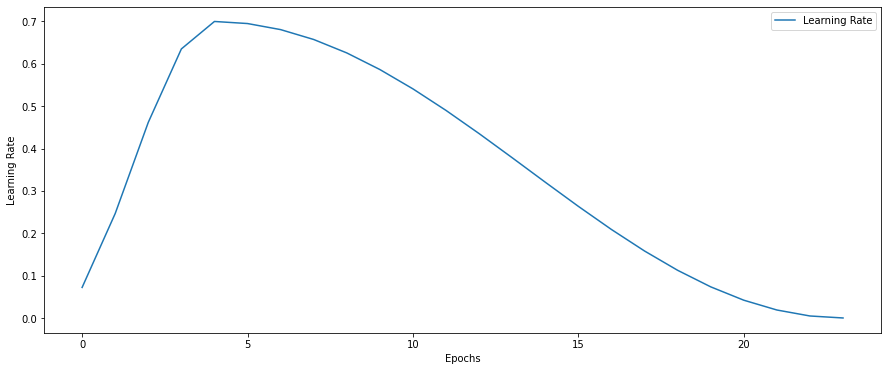

In [29]:
fileutils.plot_graphs([new_df],
            ['Learning Rate'],
            columns=['Learning Rate'],
            xlabel="Epochs",
            ylabel="Learning Rate")

### Validation Results

In [30]:
%load_ext autoreload
%autoreload 2
from RekogNizer import traintest
import torchvision.transforms as transforms
import torchvision

#my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-23b3505819.h5")
#my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-15ad50e1bc.h5", local_device=torch.device("cpu"))
#my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-2fba2384bd.h5", local_device=torch.device("cpu"))
my_model,acc = traintest.model_builder2(basemodelclass.S11ResNet(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-22305c9943.h5", local_device=torch.device("cpu"))

#class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, classes, device=torch.device("cpu"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
from RekogNizer import imgnetloader
imgnetloader.get_id_dictionary("/content/t2").keys()
#imgnetloader.get_class_to_id_dict("/content/t2")

dict_keys(['n02124075', 'n04067472', 'n04540053', 'n04099969', 'n07749582', 'n01641577', 'n02802426', 'n09246464', 'n07920052', 'n03970156', 'n03891332', 'n02106662', 'n03201208', 'n02279972', 'n02132136', 'n04146614', 'n07873807', 'n02364673', 'n04507155', 'n03854065', 'n03838899', 'n03733131', 'n01443537', 'n07875152', 'n03544143', 'n09428293', 'n03085013', 'n02437312', 'n07614500', 'n03804744', 'n04265275', 'n02963159', 'n02486410', 'n01944390', 'n09256479', 'n02058221', 'n04275548', 'n02321529', 'n02769748', 'n02099712', 'n07695742', 'n02056570', 'n02281406', 'n01774750', 'n02509815', 'n03983396', 'n07753592', 'n04254777', 'n02233338', 'n04008634', 'n02823428', 'n02236044', 'n03393912', 'n07583066', 'n04074963', 'n01629819', 'n09332890', 'n02481823', 'n03902125', 'n03404251', 'n09193705', 'n03637318', 'n04456115', 'n02666196', 'n03796401', 'n02795169', 'n02123045', 'n01855672', 'n01882714', 'n02917067', 'n02988304', 'n04398044', 'n02843684', 'n02423022', 'n02669723', 'n04465501', '

In [37]:
from RekogNizer import hyperparams

from RekogNizer import imgnetloader
# transform_test = transforms.Compose(
#     [transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                     download=True, transform=transform_test)
# testloader = dataloader.get_dataloader(testset, hyperparams.hyperparameter_defaults['batch_size'], shuffle=False, num_workers=2)

#trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()
trainloader, testloader = dataloader.get_imagenet_loaders(train_path, test_path, transform_train=None, transform_test=None)
class_accuracy_dict = traintest.classwise_accuracy(my_model, 
                                                   testloader, 
                                                   list(imgnetloader.get_id_dictionary("/content/t2").keys()), 
                                                   device=torch.device("cuda"))

Compose([
  Resize(always_apply=True, p=1, height=32, width=32, interpolation=1),
  Cutout(always_apply=True, p=1, num_holes=1, max_h_size=8, max_w_size=8),
  IAAFliplr(always_apply=False, p=0.5),
  RandomBrightnessContrast(always_apply=True, p=1, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0),
  ToTensor(always_apply=True, p=1.0, num_classes=1, sigmoid=True, normalize=None),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}) Compose([
  Resize(always_apply=True, p=1, height=32, width=32, interpolation=1),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0),
  ToTensor(always_apply=True, p=1.0, num_classes=1, sigmoid=True, normalize=None),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})
Accuracy of n02124075 : 34 %
Accuracy o

<BarContainer object of 200 artists>

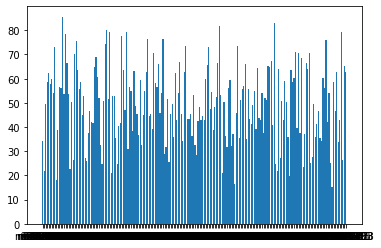

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])

### Misclassified Images

16603
(16603,)
49.68787878787879 2.2046524390018347


<Figure size 720x720 with 0 Axes>

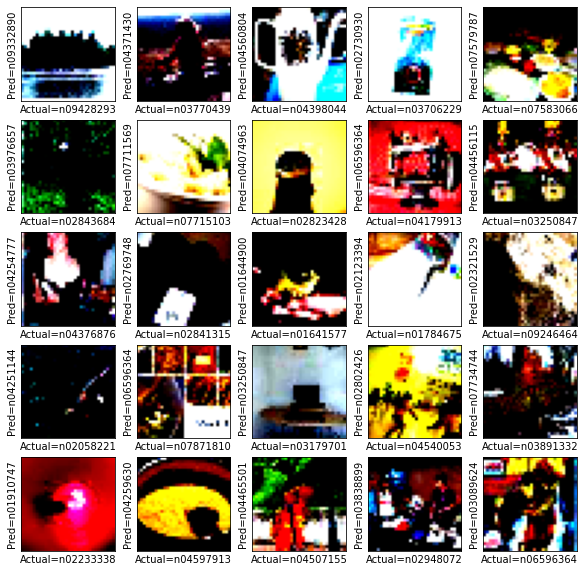

In [40]:
from RekogNizer import traintest
type(my_model)
classes = dataloader.classes
#trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()
classes = list(imgnetloader.get_id_dictionary("/content/t2").keys())
error_images, preds, actuals = traintest.show_misclassfied_images(my_model, testloader, classes)


### GRADCAM Visualizations

In [0]:
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision.utils import make_grid, save_image

from RekogNizer.gradcam2 import *

saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


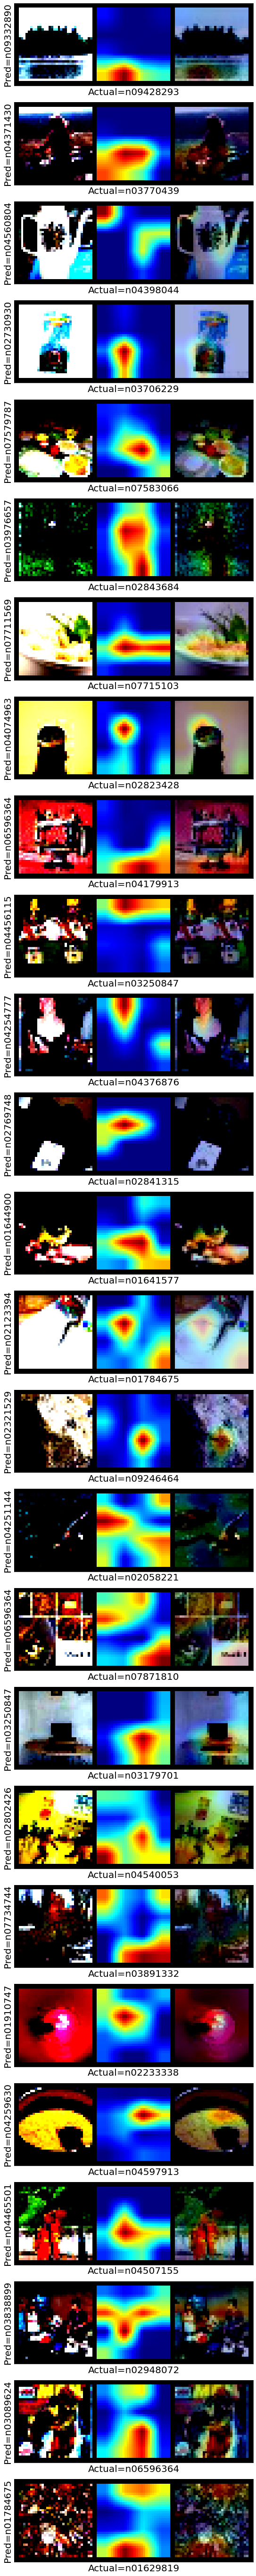

In [43]:
resnet_model_dict = dict(type='resnet', arch=my_model.to(torch.device("cpu")), layer_name='layer3', input_size=(32, 32))
mean=[0.4827, 0.4724, 0.4427]
std=[0.2482, 0.2501, 0.2698]

#classes[np.int(preds[idx])], xlabel="Actual="+classes[np.int(actuals[idx])]
classes = list(imgnetloader.get_id_dictionary("/content/t2").keys())
#dataloader.classes

#gradcam_images = []
fig = plt.figure(figsize=(100,100))
idx = 0
for elem in zip(error_images[:26], actuals[:26], preds[:26]):
    ax = fig.add_subplot(26, 1, idx+1, xticks=[], yticks=[])
    idx+=1
    npimg= visualize_gradcam_image(resnet_model_dict,
                            elem[0], 
                            classes[np.int(elem[1])], 
                            classes[np.int(elem[2])], 
                            mean=mean, std=std)
    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_xlabel(xlabel="Actual="+classes[np.int(elem[1])],fontsize=20)
    ax.set_ylabel(ylabel="Pred="+classes[np.int(elem[2])],fontsize=20)
                  #xlabel="Actual="+classes[np.int(elem[1])],fontdict=)
fig.savefig('/content/drive/My Drive/EVA4/gradcam_s10eva4.jpg')